In [ ]:
import zipfile,os,shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#data resource
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-06 09:59:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.74MB/s    in 49s     

2020-10-06 09:59:51 (6.33 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#mengekstrak zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#direktori dasar
base_dir='/tmp/rockpaperscissors'
rock_pic=os.path.join(base_dir,'rock')
paper_pic=os.path.join(base_dir,'paper')
scissors_pic=os.path.join(base_dir,'scissors')

In [ ]:
#membuat direktori untuk training data dan validation data
train=os.path.join(base_dir,'train')
val=os.path.join(base_dir,'val')

os.mkdir(train)
os.mkdir(val)

In [ ]:
#membuat direktori untuk masing-masing label dari data yang sudah dipisah
train_rock=os.path.join(train,'rock')
train_paper=os.path.join(train,'paper')
train_scissors=os.path.join(train,'scissors')
val_rock=os.path.join(val,'rock')
val_paper=os.path.join(val,'paper')
val_scissors=os.path.join(val,'scissors')

os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [ ]:
#memisahkan gambar dari masing-masing label menjadi test data dan validation data
train_rock_split, val_rock_split=train_test_split(os.listdir(rock_pic), test_size=(0.4))
train_paper_split, val_paper_split=train_test_split(os.listdir(paper_pic), test_size=(0.4))
train_scissors_split, val_scissors_split=train_test_split(os.listdir(scissors_pic), test_size=(0.4))

In [ ]:
#memasukkan data dari masing-masing label ke dalam direktori
for file in train_rock_split:
  shutil.copy(os.path.join(rock_pic, file), os.path.join(train_rock,file))
for file in train_paper_split:
  shutil.copy(os.path.join(paper_pic,file), os.path.join(train_paper,file))
for file in train_scissors_split:
  shutil.copy(os.path.join(scissors_pic,file), os.path.join(train_scissors,file))
for file in val_rock_split:
  shutil.copy(os.path.join(rock_pic, file), os.path.join(val_rock,file))
for file in val_paper_split:
  shutil.copy(os.path.join(paper_pic,file), os.path.join(val_paper,file))
for file in val_scissors_split:
  shutil.copy(os.path.join(scissors_pic,file), os.path.join(val_scissors,file))

In [ ]:
#mengimplementasikan ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150,150),
    batch_size= 4,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val,
    target_size = (150,150),
    batch_size = 4,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#menyusun layer deep learning
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#membuat model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#memulai proses learning
model.fit(
      train_generator,
      steps_per_epoch=328,  #1312/4
      epochs=5,
      validation_data=validation_generator,
      validation_steps=219,  #876/4
      verbose=2)

Epoch 1/5
328/328 - 71s - loss: 0.7750 - accuracy: 0.6418 - val_loss: 0.3844 - val_accuracy: 0.8539
Epoch 2/5
328/328 - 71s - loss: 0.2643 - accuracy: 0.9078 - val_loss: 0.2448 - val_accuracy: 0.9281
Epoch 3/5
328/328 - 71s - loss: 0.1746 - accuracy: 0.9512 - val_loss: 0.1317 - val_accuracy: 0.9589
Epoch 4/5
328/328 - 71s - loss: 0.1129 - accuracy: 0.9665 - val_loss: 0.1309 - val_accuracy: 0.9600
Epoch 5/5
328/328 - 70s - loss: 0.0810 - accuracy: 0.9748 - val_loss: 0.1764 - val_accuracy: 0.9521


Saving WIN_20201006_17_08_28_Pro.jpg to WIN_20201006_17_08_28_Pro.jpg
WIN_20201006_17_08_28_Pro.jpg
paper


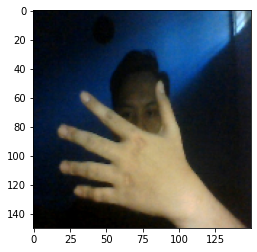

In [ ]:
#membuat widget
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')